# Section 23: Sentiment Analysis

## Rule Based Sentiment

### Using TextBlob

In [5]:
from textblob import TextBlob

In [6]:
sentence_1 = "i had a great time at the movie it was really funny"
sentence_2 = "i had a great time at the movie but the parking was terrible"
sentence_3 = "i had a great time at the movie but the parking wasn't great"
sentence_4 = "i went to see a movie"

In [7]:
print(sentence_1)
sentiment_score1 = TextBlob(sentence_1)
print(sentiment_score1.sentiment.polarity)

i had a great time at the movie it was really funny
0.525


In [8]:
print(sentence_2)
sentiment_score2 = TextBlob(sentence_2)
print(sentiment_score2.sentiment.polarity)

i had a great time at the movie but the parking was terrible
-0.09999999999999998


In [9]:
print(sentence_3)
sentiment_score3 = TextBlob(sentence_3)
print(sentiment_score3.sentiment.polarity)

i had a great time at the movie but the parking wasn't great
0.8


### Using Vader

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [11]:
vader_sentiment = SentimentIntensityAnalyzer()

In [12]:
print(sentence_1)
print(vader_sentiment.polarity_scores(sentence_1))
# prints a score for each sentiment, and a compound score
# did a lot better recognizing the positive sentiment here

i had a great time at the movie it was really funny
{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.807}


In [13]:
print(sentence_2)
print(vader_sentiment.polarity_scores(sentence_2))
# more aggresive on the negative sentiment for this one

i had a great time at the movie but the parking was terrible
{'neg': 0.234, 'neu': 0.621, 'pos': 0.144, 'compound': -0.3818}


In [14]:
print(sentence_3)
print(vader_sentiment.polarity_scores(sentence_3))
# very different results than textblob here

i had a great time at the movie but the parking wasn't great
{'neg': 0.247, 'neu': 0.611, 'pos': 0.142, 'compound': -0.4387}


In [15]:
print(sentence_4)
print(vader_sentiment.polarity_scores(sentence_4))

i went to see a movie
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


## Pre-trained Transformer Models

In [16]:
import transformers
from transformers import pipeline

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis")

In [ ]:
print(sentence_1)
sentiment_pipeline(sentence_1)

i had a great time at the movie it was really funny


## Practical Test

In [23]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [24]:
data = pd.read_csv('book_reviews_sample.csv')
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


Lets do some basic cleaning: remove punct and lowercase

In [25]:
data['reviewtext_clean'] = data['reviewText'].apply(lambda x: re.sub(r"([^\w\s])", "", x.lower()))

data.head()

,index,reviewText,rating,reviewtext_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


lets get the vader sentiment first

In [26]:
vader_sentiment = SentimentIntensityAnalyzer()
data['vader_sent_comp'] = data['reviewtext_clean'].apply(lambda x: vader_sentiment.polarity_scores(x)['compound'])
data.head()

,index,reviewText,rating,reviewtext_clean,vader_sent_comp
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


next, we'll classify these scores:

In [28]:
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']


In [33]:
data['vader_sent_comp_label'] = pd.cut(data['vader_sent_comp'], bins=bins, labels=names)
data.head()

,index,reviewText,rating,reviewtext_clean,vader_sent_comp,vader_sent_comp_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative


<Axes: xlabel='vader_sent_comp_label'>

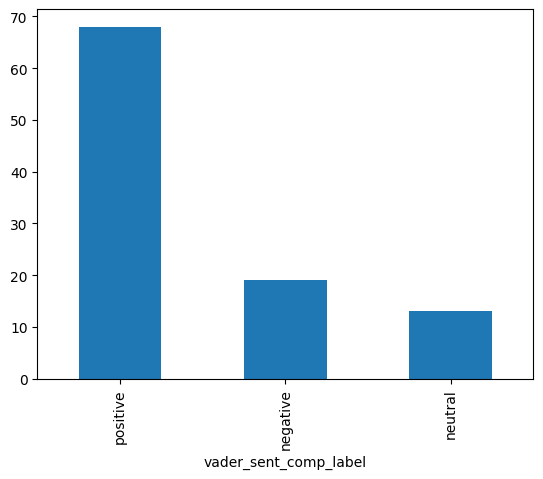

In [34]:
data['vader_sent_comp_label'].value_counts().plot.bar()